In [1]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from math import ceil, floor
from scipy import misc
import numpy as np
import math as mt
%matplotlib inline

In [2]:
img = misc.imread("baboon.png", mode = "L")

/home/decioaguiar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


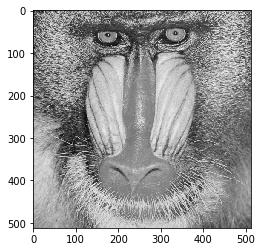

In [3]:
plt.imshow(img, cmap="gray")
plt.show()

In [4]:
def vizinho_mais_proximo(img,x_,y_):
    if(not( int(round(x_)) >= img.shape[1] or int(round(y_)) >= img.shape[0] or int(round(y_)) < 0 or  int(round(x_)) < 0)):
        return img[int(round(x_)), int(round(y_))]
    else: 
        return 0

In [5]:
def interpolacao_vmp(img, escala):
    nova_img = np.zeros((int(escala*(img.shape[0])),int(escala*(img.shape[1])))) 
    linhas = nova_img.shape[0]
    colunas = nova_img.shape[1]
    for l in range(linhas):
        for c in range(colunas):
            nova_img[l,c] = vizinho_mais_proximo(img,(l/escala), (c/escala))
    return nova_img

In [6]:
vmp = interpolacao_vmp(img, 2.0)

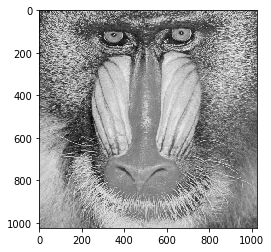

In [7]:
plt.imshow(vmp, cmap="gray")
plt.show()

In [8]:
def bilinear(img,x_,y_):
    dx = x_ - floor(x_)
    dy = y_ - floor(y_)
    
    v1=v2=v3=v4=0
    
    if(not( floor(x_) >= img.shape[1] or floor(y_) >= img.shape[0] or floor(y_) < 0 or  floor(x_) < 0)):
        v1 = img[floor(x_),floor(y_)]
    if(not( floor(x_)+1 >= img.shape[1] or floor(y_) >= img.shape[0] or floor(y_) < 0 or  floor(x_)+1 < 0)):
        v2 = img[floor(x_)+1, floor(y_)]
    if(not( floor(x_) >= img.shape[1] or floor(y_)+1 >= img.shape[0] or floor(y_)+1 < 0 or  floor(x_) < 0)):
        v3 = img[floor(x_), floor(y_)+1]
    if(not( floor(x_)+1 >= img.shape[1] or floor(y_)+1 >= img.shape[0] or floor(y_)+1 < 0 or  floor(x_)+1 < 0)):
        v4 = img[floor(x_)+1, floor(y_)+1]
    
    return (1-dx)*(1-dy)*v1 + dx*(1-dy)*v2 + (1-dx)*dy*v3 + dx*dy*v4

In [9]:
def interpolacao_bilinear(img, escala):
    nova_img = np.zeros((int(escala*(img.shape[0]-1)),int(escala*(img.shape[1]-1)))) 
    linhas = nova_img.shape[0]
    colunas = nova_img.shape[1]
    for l in range(linhas):
        for c in range(colunas):
            nova_img[l,c] = bilinear(img, (l/escala), (c/escala))
    return nova_img

In [10]:
intbi = interpolacao_bilinear(img, 2.0)

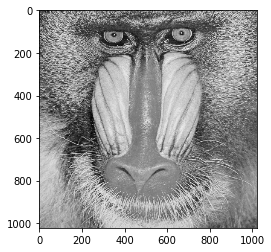

In [11]:
plt.imshow(intbi, cmap="gray")
plt.show()

In [12]:
def P(t):
    if(t>0):
        return t
    else:
        return 0.0

In [13]:
def R(s):
    return (1/6.0) * ( (P(s+2) ** 3) - 4*(P(s+1)**3) + 6*(P(s+1)**3) - 4*(P(s-1)**3) )

In [14]:
def bicubica(img, x_, y_):
    dx = x_ - floor(x_)
    dy = y_ - floor(y_)
    soma = 0
    for m in range(-1,3,1):
        for n in range(-1,3,1):
            if( ((floor(x_) + m) >= 0) and ((floor(y_)+n) >= 0) and ( (floor(x_)+m) < img.shape[0] ) and ( (floor(y_) + n) < img.shape[1] )):                
                soma += (img[(floor(x_)+m), (floor(y_)+n)]) * R(m-dx) * R(dy-n)
    return soma                

In [15]:
def interpolacao_bicubica(img, escala):
    nova_img = np.zeros((int(escala*(img.shape[0])),int(escala*(img.shape[1])))) 
    linhas = nova_img.shape[0]
    colunas = nova_img.shape[1]
    for l in range(linhas):
        for c in range(colunas):
            nova_img[l,c] = bicubica(img, (l/escala), (c/escala))
    return nova_img

In [16]:
img_bicubica = interpolacao_bicubica(img, 0.5)

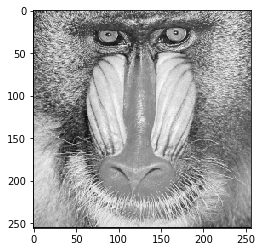

In [17]:
plt.imshow(img_bicubica, cmap="gray")
plt.show()

In [18]:
def rotacao_vmp(img, theta):
    nova_img = np.zeros( ((img.shape[0]),(img.shape[1])) ) 
    theta = np.deg2rad(theta)
    linhas = nova_img.shape[0]
    colunas = nova_img.shape[1]
    xm = linhas//2
    ym = colunas//2
    for l in range(linhas):
        for c in range(colunas):
            x_ = (l-xm)*np.cos(theta) + (c-ym)*np.sin(theta)
            x_ += xm
            y_ = (l-xm)*np.sin(theta) - (c-ym)*np.cos(theta)
            y_ += ym
            nova_img[l,c] = vizinho_mais_proximo(img,x_,y_)
    return nova_img

In [19]:
rot_vmp = rotacao_vmp(img, 60)

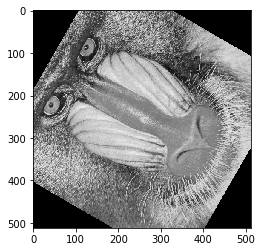

In [20]:
plt.imshow(rot_vmp, cmap="gray")
plt.show()

In [21]:
def rotacao_bilinear(img, theta):
    nova_img = np.zeros( ((img.shape[0]),(img.shape[1])) ) 
    theta = np.deg2rad(theta)
    linhas = nova_img.shape[0]
    colunas = nova_img.shape[1]
    xm = linhas//2
    ym = colunas//2
    for l in range(linhas):
        for c in range(colunas):
            x_ = (l-xm)*np.cos(theta) + (c-ym)*np.sin(theta)
            x_ += xm
            y_ = (l-xm)*np.sin(theta) - (c-ym)*np.cos(theta)
            y_ += ym
            nova_img[l,c] = bilinear(img,x_,y_)
    return nova_img

In [22]:
rot_bilinear = rotacao_bilinear(img, 60)

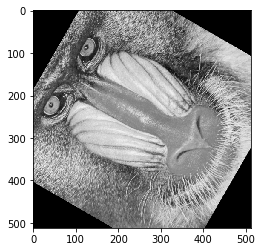

In [23]:
plt.imshow(rot_bilinear, cmap="gray")
plt.show()

In [24]:
def rotacao_bicubica(img,theta):
    nova_img = np.zeros( ((img.shape[0]),(img.shape[1])) ) 
    theta = np.deg2rad(theta)
    linhas = nova_img.shape[0]
    colunas = nova_img.shape[1]
    xm = linhas//2
    ym = colunas//2
    for l in range(linhas):
        for c in range(colunas):
            x_ = (l-xm)*np.cos(theta) + (c-ym)*np.sin(theta)
            x_ += xm
            y_ = (l-xm)*np.sin(theta) - (c-ym)*np.cos(theta)
            y_ += ym
            nova_img[l,c] = bicubica(img,x_,y_)
    return nova_img

In [25]:
rot_bicubica = rotacao_bicubica(img, 60)

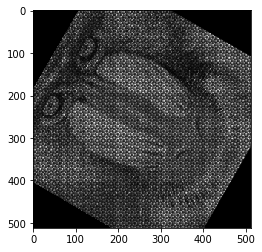

In [26]:
plt.imshow(rot_bicubica, cmap="gray")
plt.show()